
# <span style="color:rgb(213,80,0)">Fish Morphology data.</span>

This file creates Figures 8.36\-8.39

## Beginning of code

In [1]:
prin=0;

load FishMorphology.mat

% Select the rows whose Habitat is 1
boo=FishMorphology.Habitat==1;
FishMorphology=FishMorphology(boo,:);
% Extract the 10 variables mentioned in the book
namX=["Bg", "Bd", "Bcw", "Jw", "Jl", "Bp", "Bac", "Bch", "Fc","Fdw"];
namy="Mass";
y=FishMorphology{:,namy};
Xori=FishMorphology(:,namX);
% Apply the ilr transformation
X=pivotCoord(Xori{:,:});

conflev=[0.95 0.99];

## Create Figure 8.36

S estimators with 2 values of bdp


In [2]:
% Note that the pattern of residuals changes completely
% Using bdp=0.25 two units are declared as outliers
% Using bdp 17 units are declared as outliers.
figure;
h1=subplot(2,1,1);
bdp=0.25;
[out]=Sreg(y,X,'nsamp',3000,'bdp',bdp);

Total estimated time to complete S estimate:  1.49 seconds

In [3]:
resindexplot(out,'h',h1,'conflev',conflev);
ylabel(['Breakdown point =' num2str(bdp)])
title('')
h2=subplot(2,1,2);
bdp=0.5;
[out]=Sreg(y,X,'nsamp',3000,'bdp',bdp);

Total estimated time to complete S estimate:  1.61 seconds


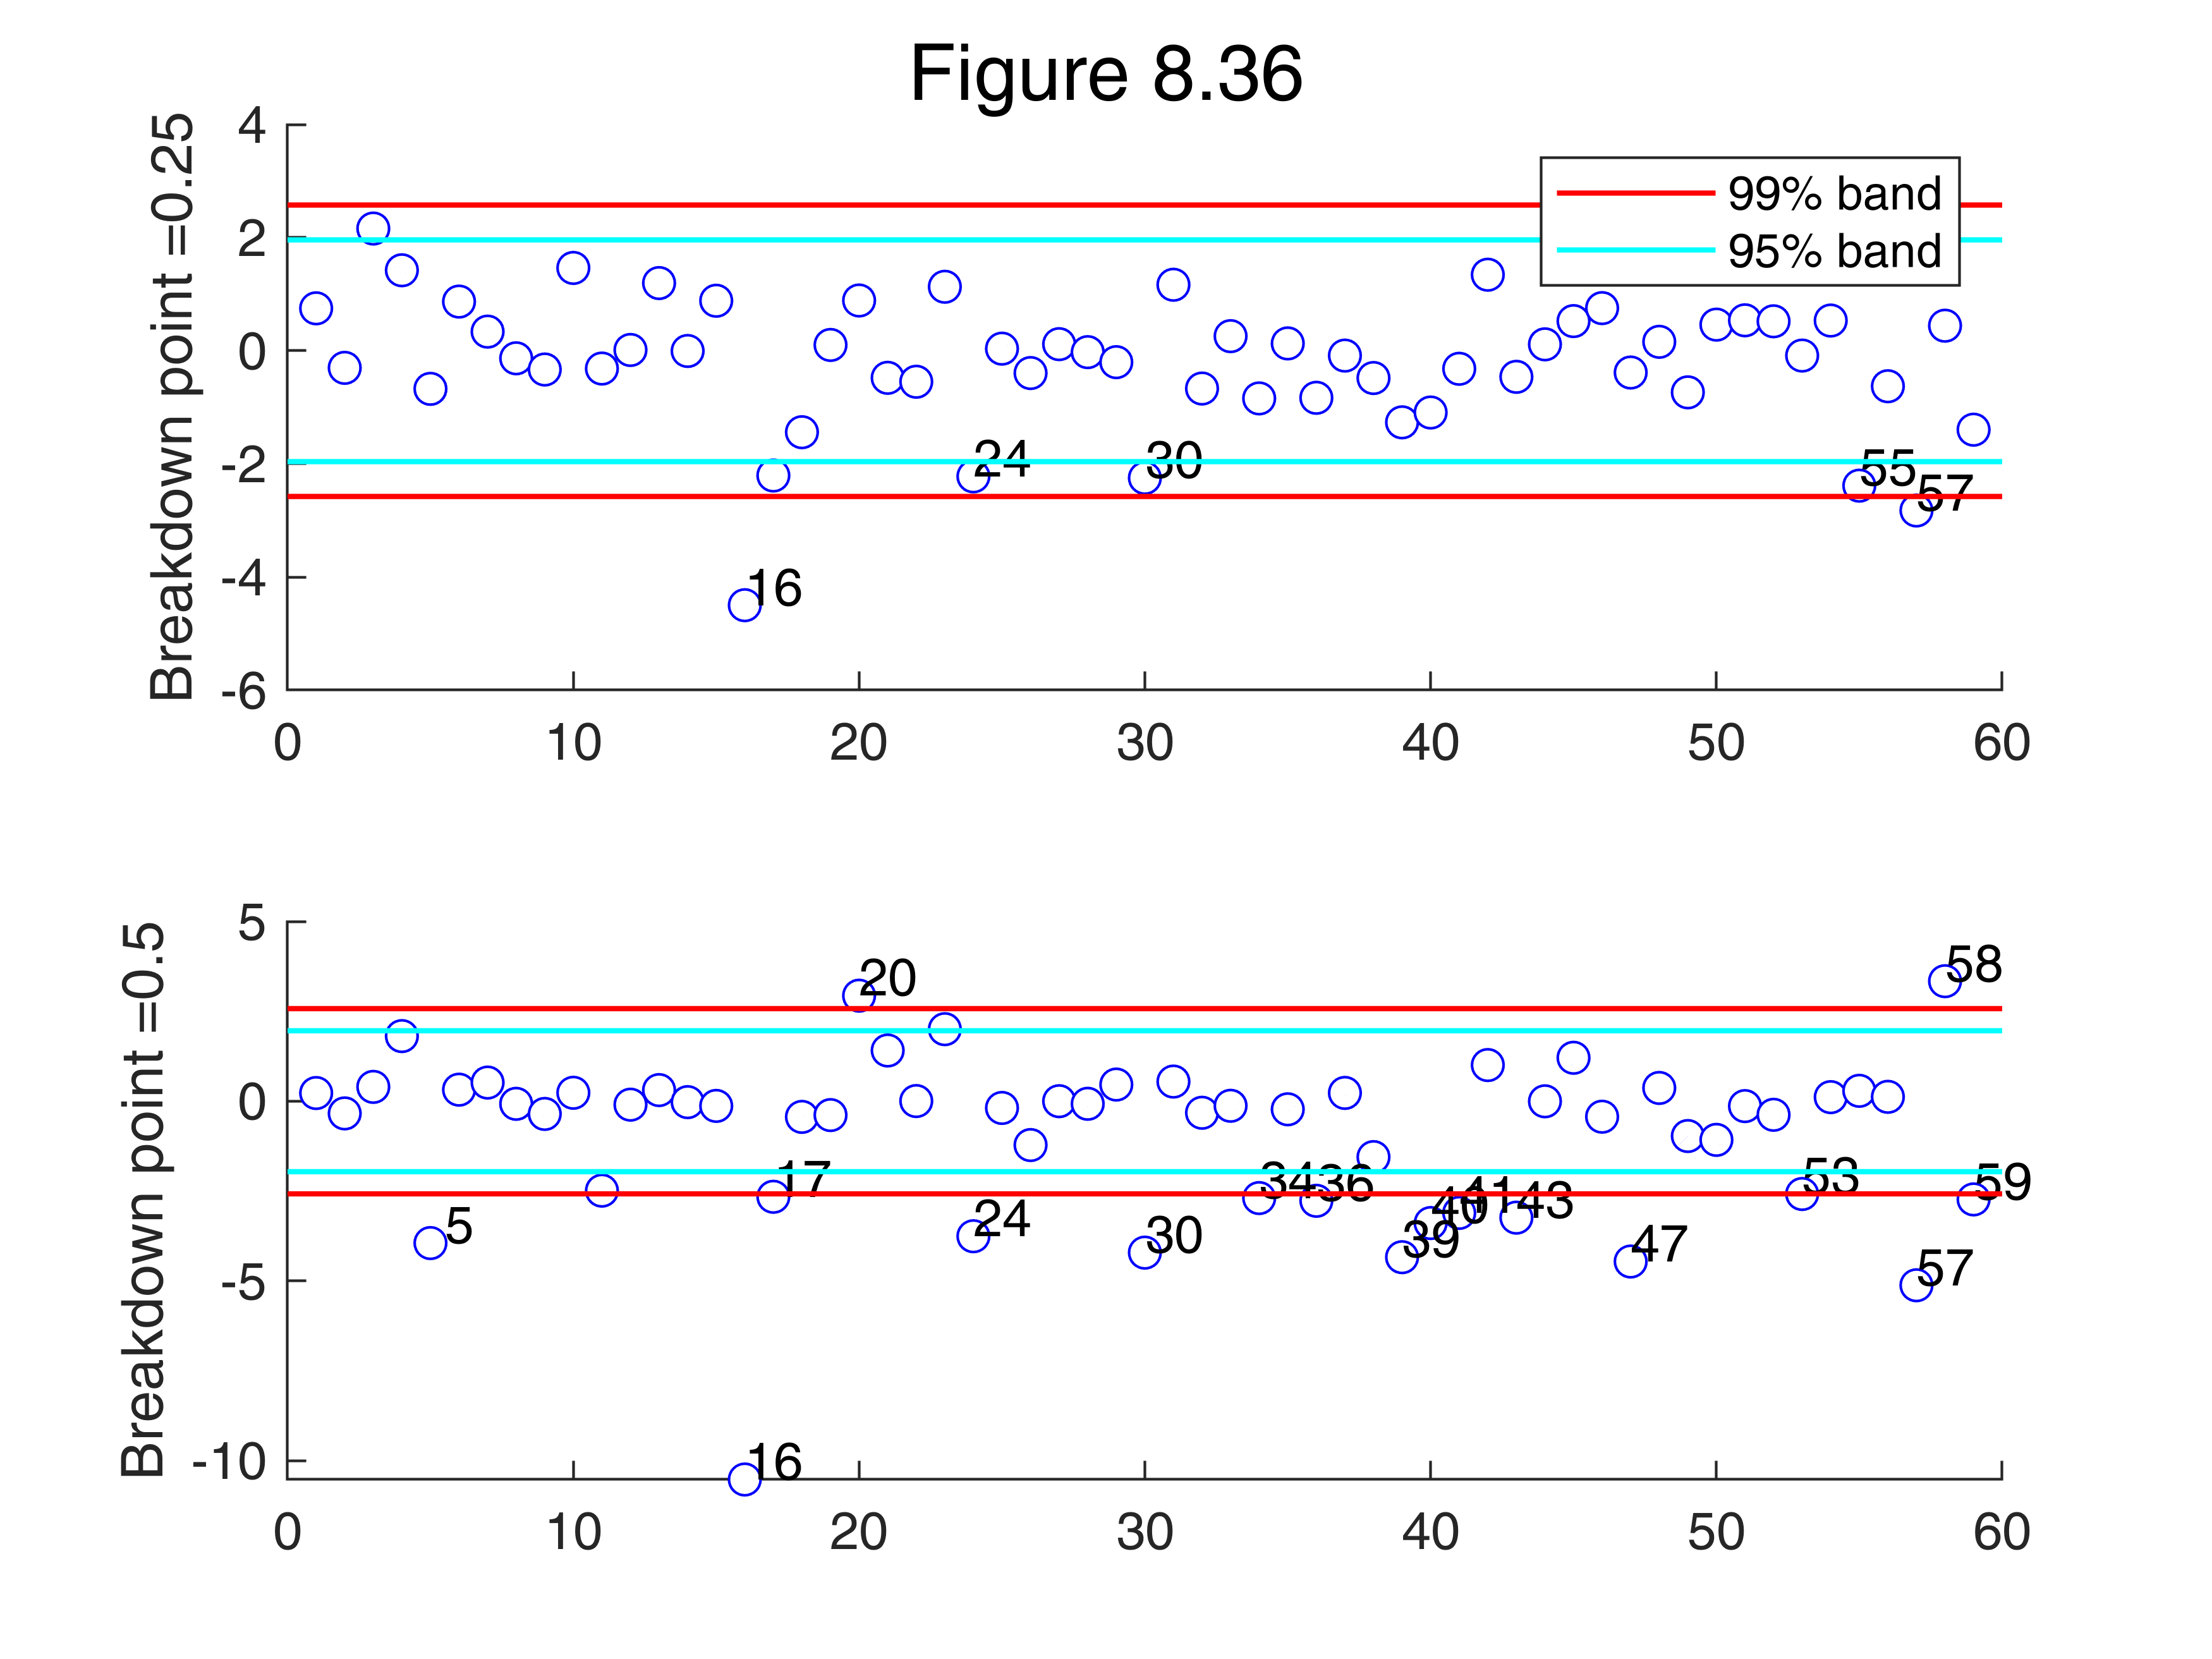

In [4]:
resindexplot(out,'h',h2,'conflev',conflev,'numlab',{17});
ylabel(['Breakdown point =' num2str(bdp)])
title('')
cascade;
if prin==1
    % print to postscript
    print -depsc fishmilr_S.eps;
else
    sgtitle('Figure 8.36')
    set(gcf,"Name",'Figure 8.36')
end

In [5]:

drawnow

## Create Figure 8.37

MM estimators with 2 values of efficiency MMreg using two different level of efficiency Note that the pattern of residuals changes completely Using eff=0.90 the outliers are correctly found, on the other hand using eff=0.95 the masking effect is clear


In [6]:
figure;
h1=subplot(2,1,1);
eff=0.80;
[out]=MMreg(y,X,'Snsamp',3000,'eff',eff);

Total estimated time to complete S estimate:  1.52 seconds

In [7]:
resindexplot(out,'h',h1,'conflev',conflev,'numlab',{6});
ylabel(['Eff.=' num2str(eff)])
h2=subplot(2,1,2);
eff=0.99;
[out]=MMreg(y,X,'Snsamp',3000,'eff',eff);

Total estimated time to complete S estimate:  1.41 seconds


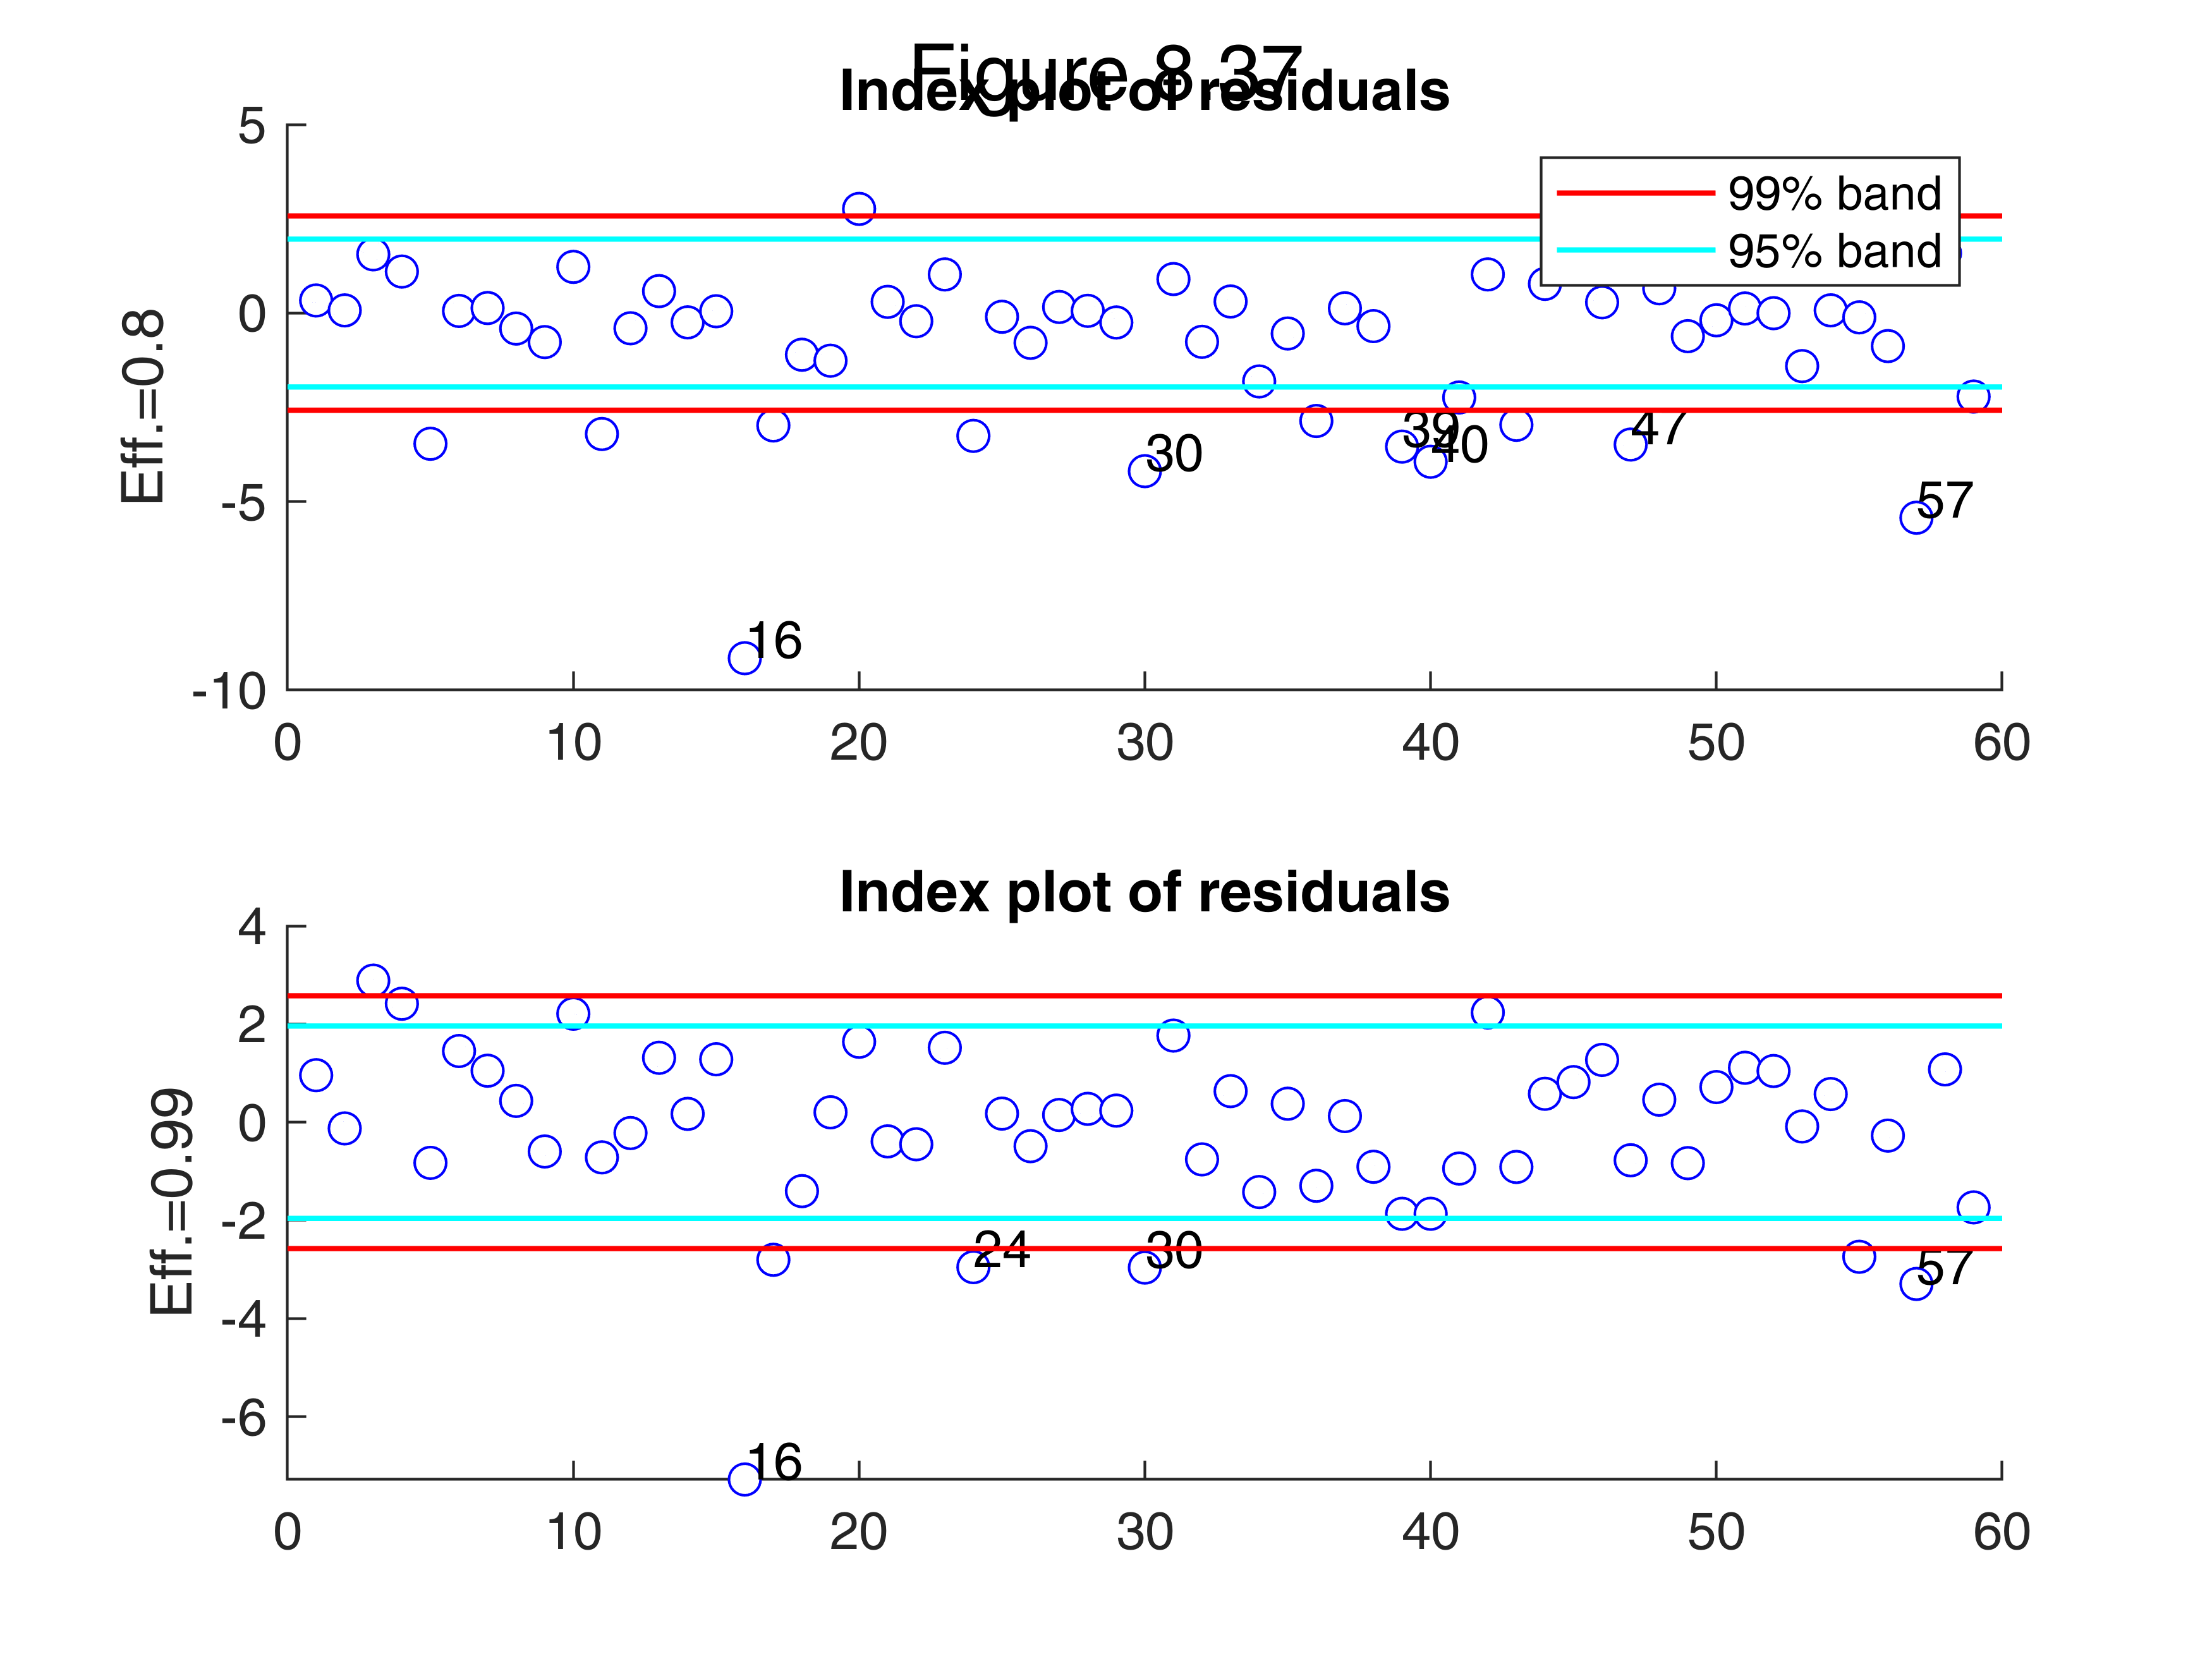

In [8]:
resindexplot(out,'h',h2,'conflev',conflev,'numlab',{4});
ylabel(['Eff.=' num2str(eff)])
if prin==1
    % print to postscript
    print -depsc fishmilr_MM.eps;
else
    sgtitle('Figure 8.37')
    set(gcf,"Name",'Figure 8.37')
end

In [9]:

drawnow

## Create Figure 8.38

Monitoring S estimates



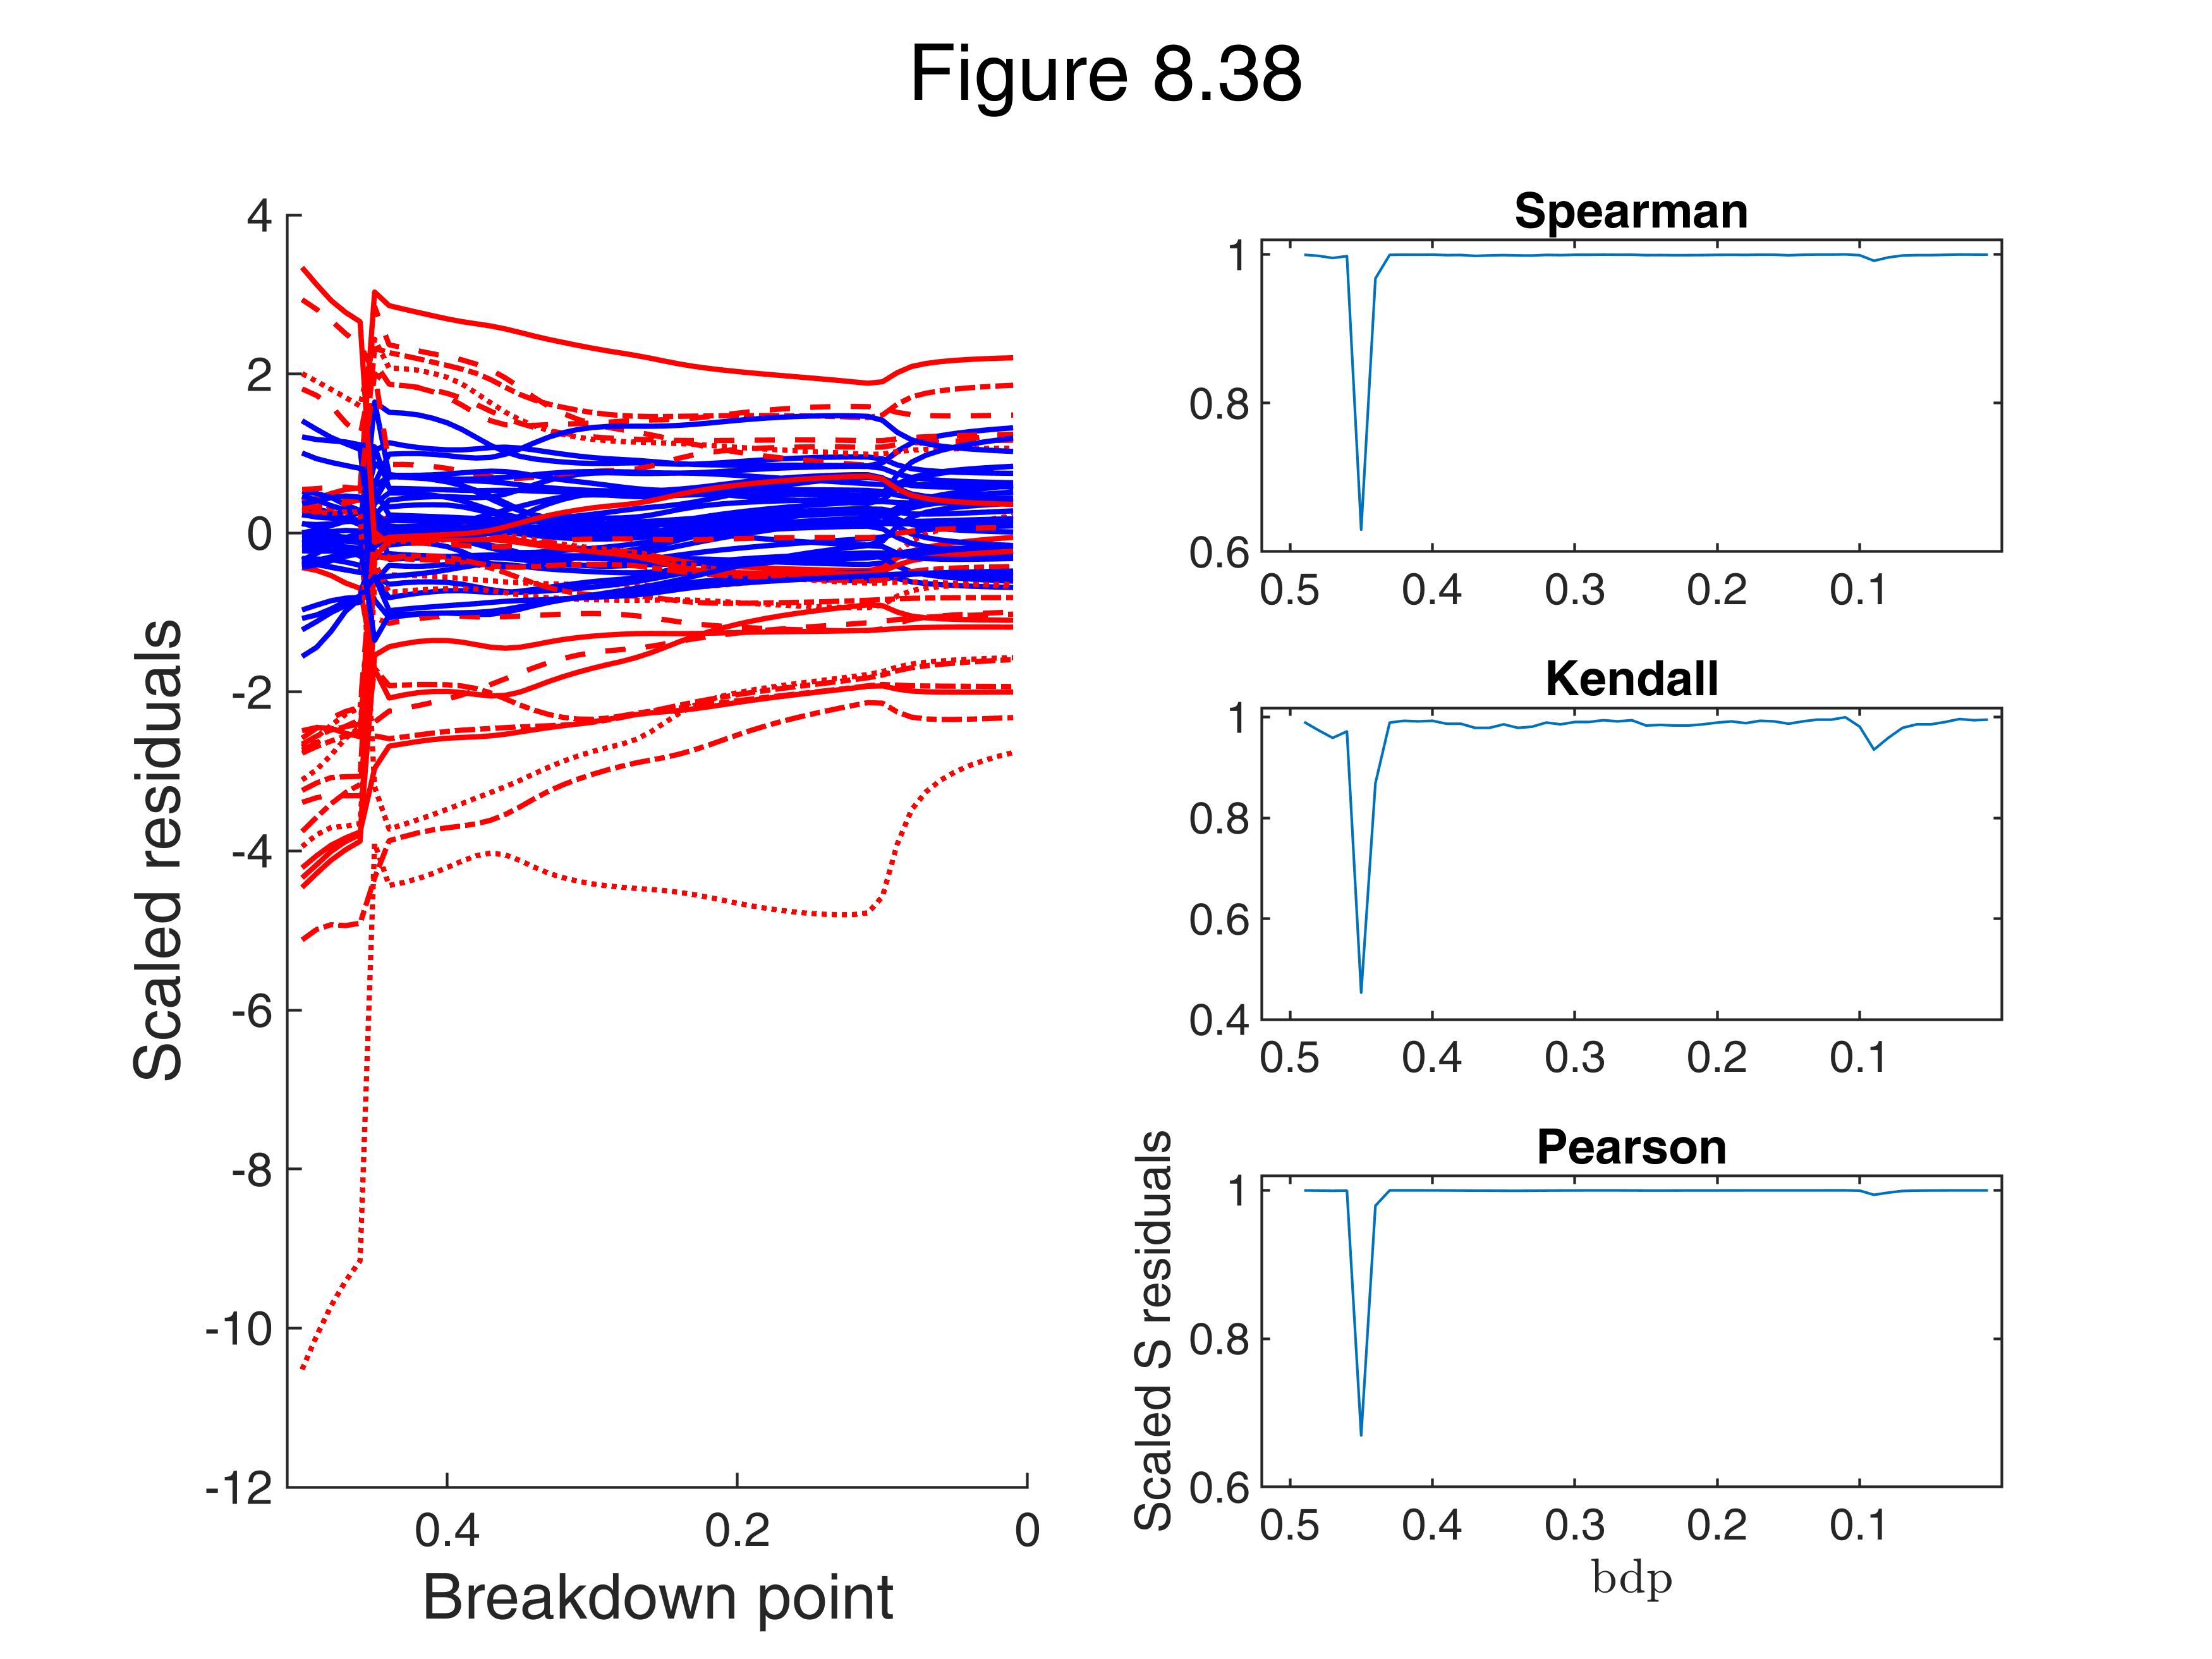

In [10]:
[out]=Sregeda(y,X,'msg',0);
fground = struct;
fground.Color={'r'};
fground.flabstep = '';
fground.fthresh=2.0;
resfwdplot(out, 'fground', fground, 'datatooltip','', 'corres', 1,'tag','pl_Sres');
ylabel('Scaled S residuals');
xlabel('bdp');

if prin==1
    % print to postscript
    print -depsc fishmilr_S_mon.eps;
else
    sgtitle('Figure 8.38')
    set(gcf,"Name",'Figure 8.38')
end

In [11]:
drawnow

## Create Figure 8.39

Monitoring MM estimtes


In [12]:
[out]=MMregeda(y,X);

Total estimated time to complete S estimate:  0.07 seconds


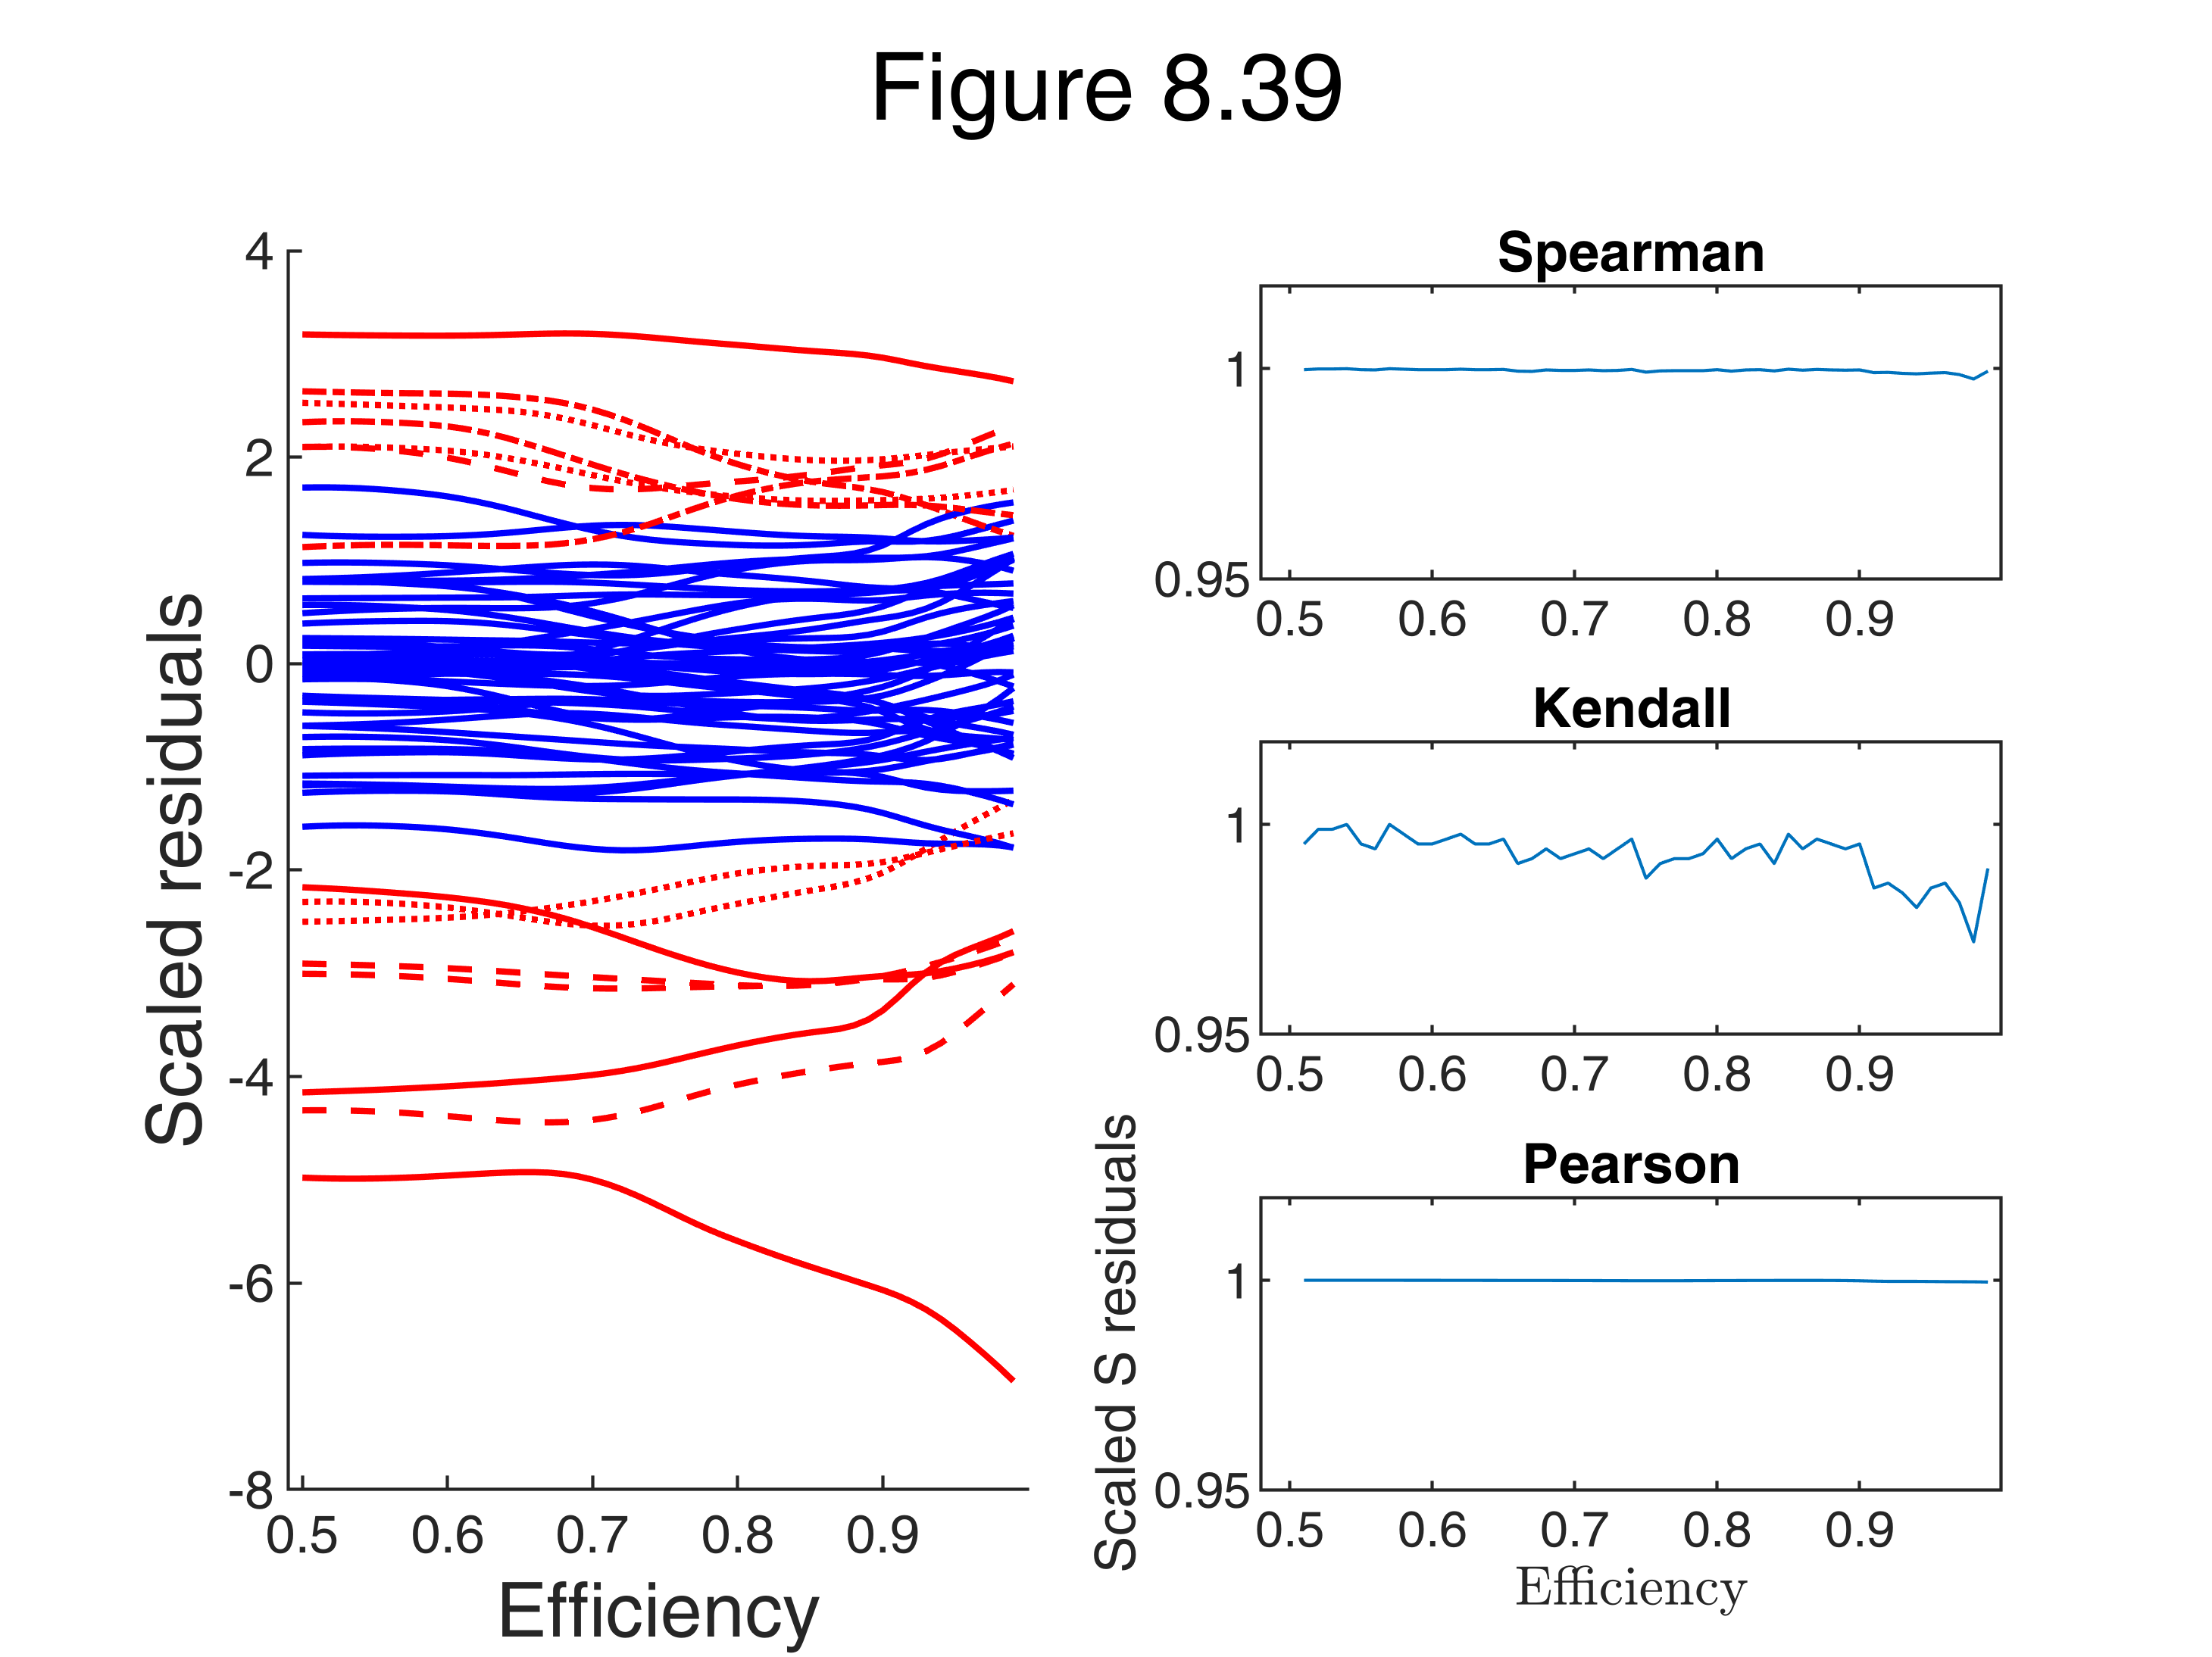

In [13]:
fground = struct;
fground.Color={'r'};
fground.flabstep = '';
fground.fthresh=2.0;
resfwdplot(out, 'fground', fground, 'datatooltip','', 'corres', 1);
ylabel('Scaled S residuals');
xlabel('Efficiency');

if prin==1
    % print to postscript
    print -depsc fishmilr_MM_mon.eps;
else
    sgtitle('Figure 8.39')
    set(gcf,"Name",'Figure 8.39')
end

In [14]:

%InsideREADME